# Case Study - Titanic


## Table of Contents


[**Step 1: Business Understanding**](#Step-1:-Business-Understanding)

[**Step 2: Data Understanding**](#Step-2:-Data-Understanding)

- [**Load Data**](#Load-Data)
- [**Check Data Quality**](#Check-Data-Quality)
- [**Exploratory Data Analysis-EDA**](#Exploratory-Data-Analysis---EDA)
 

[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding
This initial phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition, and a preliminary plan designed to achieve the objectives.
#### Titanic Story
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class passengers.

#### Objective
In this challenge, we will complete the analysis of what sorts of people were likely to survive. 

In addition, we will build a regression model to predict ticket price(Fare).



[Back to Top](#Table-of-Contents)

## Step 2: Data Understanding
The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information. This step is often mixed with the next step, Data Preparation.

### Data Dictionary
The data is in a csv file titanic.csv. 

| Variable | Definition | Key |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | male/femail |	
| Age | Age | in years |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

**Variable Notes**
- pclass: A proxy for socio-economic status (SES)
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
 - Parent = mother, father
 - Child = daughter, son, stepdaughter, stepson
 - Some children travelled only with a nanny, therefore parch=0 for them.



### Load Data

This dataset is in titanic.csv. Make sure the file is in current folder. Please download the file from [here](https://github.com/data-lessons/python-business/tree/gh-pages/data) if you haven't done so yet.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\USER\Desktop\Azubi Africa\class files\Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


### Check Data Quality
Check data quality. Most common check is to check missing values. We can do some basic data cleaning like cleaning up currency field.
- Check null values
- Currency field need to be converted to float, remove '$' or ',', sometimes negative value is enclosed in ()


##### Task1: Check out Basic Dataframe Info

Hint: info() function.

Discuss missing values in the dataframe.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


##### Task2: Clean up Fare, Convert to Float
Strip "$" from Fare, convert datatype to float.

In [50]:
 #Strip "$" from Fare, convert datatype to float.
#df['Fare'] = df['Fare'].str.lstrip('$')
#df['Fare']
df['Fare']  = df['Fare'].astype(float)
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

##### Task3: Check out statistics of Numeric Columns

Hint:describe() function.

Discuss:
- Age, SibSp, Parch, Fare statistics
- What does mean Survived mean?

In [8]:
# Task3: Check out statistics of Numeric Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
The statistic analysis of the Titanic dataset reveals that majority of the passengers on bord are young 
folks with average age of about 29.7 even though about 177 of age data of some passengers are missing  yet there both 
passengers spanning from infant to old folks on borad from less than a year old to 80 years of age. The sibling 
and couples on bord is an indication that families are present on bord. The Fare statistics shows a very low price 
and also a very high fare which is also an indication that there both low, midle and hihg class set of folks on bord.

What does mean Survived mean? This is the average of passengers that survived the boat sink which is about 38.4 percent of
the total passengers, it is an indication that large percentage of passengers loss there life.


### Exploratory Data Analysis - EDA
EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

#### Types Of Features
##### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: Sex,Embarked.

##### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset: Fare

### Categorical Features
We will analysis Survived as univariant. Relationship between Sex and Survival, Embarked and Survivval.

#### How many survived
Bar chart on Survived column. There are multiple ways to do the bar chart. We will demonstrate 2 ways here, seaborn countplot and pandas series bar.

##### Task4: Plot bar chart for Perished vs. Survived
Plot bar chart for Survived column. Survived=0 means perished, Survived=1 means Survived.

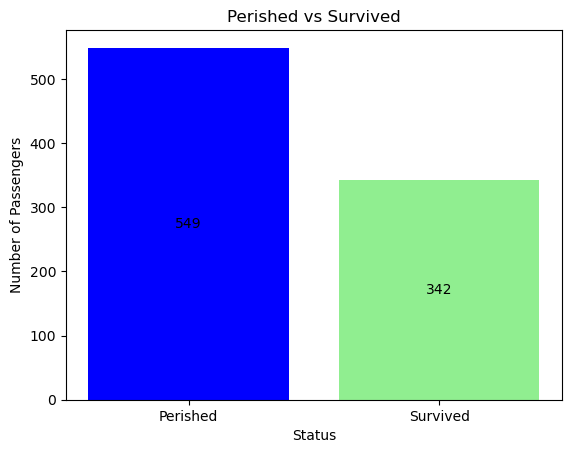

In [14]:
#  Task4: Plot bar chart for Perished vs. Survived
# Count the occurrences of each unique value in the 'Survived' column
survival_counts = df['Survived'].value_counts()
 
# Create a bar chart
plot = plt.bar(survival_counts.index, survival_counts.values, color = ['blue','lightgreen'])
plt.bar_label(plot, label = survival_counts, label_type = 'center') 
# Set the x-axis tick labels to 'Perished' and 'Survived' respectively
plt.xticks(survival_counts.index, ['Perished', 'Survived'])
 
# Set the title and labels
plt.title('Perished vs Survived') 
plt.xlabel('Status')
plt.ylabel('Number of Passengers')
 
# Show the plot
plt.show()

#### Relationship between Sex and Survival
We may use aggregation function or plot.

Next 2 cells demonstate aggregate function.

The following cell demonstrates bar plot and countplot.


##### Task5: Plot Bar Chart on Number of Male and Femal Passengers

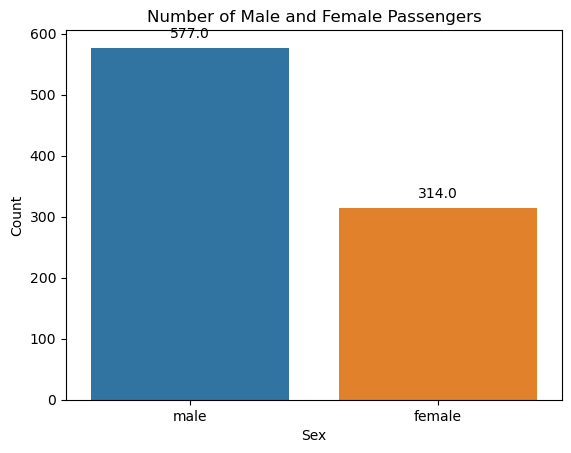

In [64]:
# Relationship between Sex and Survival
# Task5: Plot Bar Chart on Number of Male and Femal Passengers
gender_count = df['Sex'].value_counts()

# Plot
ax = sns.barplot(x=gender_count.index, y=gender_count.values)

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Add labels and title
plt.title('Number of Male and Female Passengers')
plt.xlabel('Sex')
plt.ylabel('Count')



# Show the plot
plt.show()

##### Task6: Groupby Sex to Find Survival Rate of Male and Female

In [16]:
# Task6: Groupby Sex to Find Survival Rate of Male and Female

survival_rate = df.groupby('Sex')['Survived'].mean()
percentage = survival_rate*100
# Print the survival rate for males and females 

print(f'Survival Rate by',percentage)

Survival Rate by Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


##### Task7: Plot Perished vs. Survived Bar for Male and Femail
We will use seaborn countplot() again, but set argument `hue` to 'Survived'.

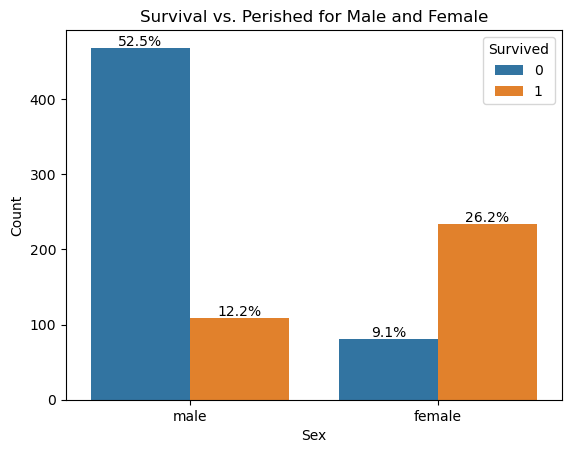

In [41]:
# Task7: Plot Perished vs. Survived Bar for Male and Female
# Plotting with seaborn
sns.countplot(x='Sex', hue='Survived', data=df)

# Add data labels
total = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2, p.get_height() + 3, '{:.1%}'.format(height/total), ha='center', color='black', fontsize=10)

# Add labels and title
plt.title('Survival vs. Perished for Male and Female')
plt.xlabel('Sex')
plt.ylabel('Count')

# Show the plot
plt.show()

The number of men on the ship is lot more than the number of women. Still the number of survived women is almost twice the number of survived males. Majority women survived while vast majority of men perished.

#### Pclass and Survival
##### Task 8: List survival rate of each Pclass 

In [18]:
# Task 8: List survival rate of each Pclass

survival_rate = df.groupby('Pclass')['Survived'].mean()
pecentange = survival_rate*100
# Print the survival rate for each Pclass

print(f'List of survival rate for each',pecentange)

List of survival rate for each Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


##### Task 9: Plot Perished vs. Survived for each Pclass

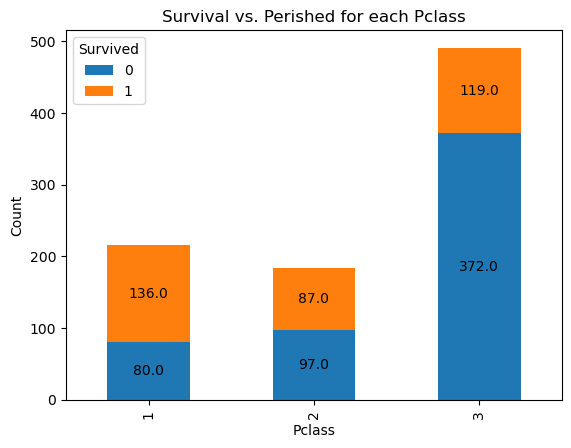

In [40]:
# Task 9: Plot Perished vs. Survived for each Pclass

# Group data by Pclass and Survival
grouped = df.groupby(['Pclass', 'Survived']).size().unstack()

# Plot
ax = grouped.plot(kind='bar', stacked=True)

# Add data labels
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()    
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center')

# Add labels and title
plt.title('Survival vs. Perished for each Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')

# Show the plot
plt.show()

### Continuous Features


#### Univariate Distribution Plot
There are multiple ways to do histogram. I will demonstrate 3 ways.
- ax.hist(): can not handle NnN value
- seaborn.distplot(): can not handle NaN. Has KDE(kernel density estimation) by default.
- pd.Sereis.hist(): simplest and can handle NaN by default

##### Task 10: Plot histogram for Age
Use pandas Series hist() function which handles missing value.

Text(0, 0.5, 'Frequency')

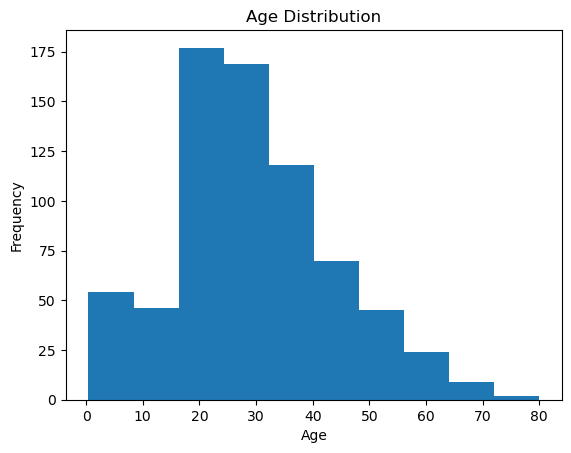

In [33]:
# Task 10: Plot histogram for Age
df['Age'].plot.hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

##### Task11: Stack age histogram of survived on top of overall age histogram
Plot histogram for Age, then filter out survived passenger and plot histogram for Age on same axis. Set different color and label.

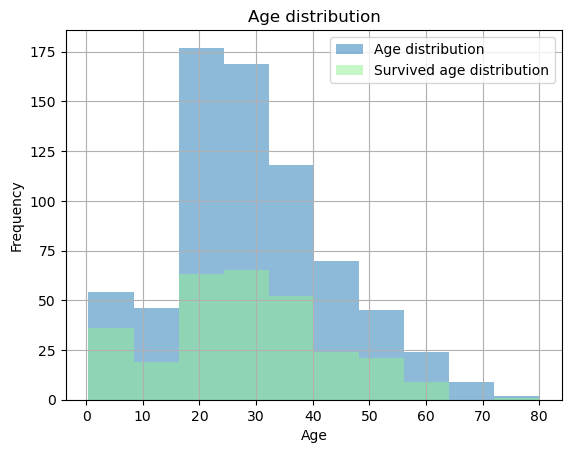

In [38]:
# Stack age histogram of survived on top of overall age histogram
df['Age'].hist(alpha=0.5,label='Age distribution')
# survied passenger and plotting
df[df['Survived'] == 1]['Age'].hist(alpha=0.5, color= 'lightgreen',label='Survived age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.legend()
plt.show()

Children have higher survival rate.

[Back to Top](#Table-of-Contents)
